# Chap.10 より実践的な前処理

In [9]:
# ライブラリの準備 
import pandas as pd
%matplotlib inline

## 10.1 さまざまなデータの読み込み

### 10.1.1 表データの区切り文字

In [10]:
# 10-1 bike.tsvを読み込む
df = pd.read_csv('../support/datafiles/bike.tsv')
print(df.head(3))
df.shape

  dteday\tholiday\tweekday\tworkingday\tweather_id\tcnt
0                        2011-01-01\t0\t6\t0\t2\t985   
1                        2011-01-02\t0\t0\t0\t2\t801   
2                       2011-01-03\t0\t1\t1\t1\t1349   


(731, 1)

In [11]:
# 10-2 read_cvs()関数にパラメータ引数を追加する
df = pd.read_csv('../support/datafiles/bike.tsv', sep='\t')
print(df.head(3))

       dteday  holiday  weekday  workingday  weather_id   cnt
0  2011-01-01        0        6           0           2   985
1  2011-01-02        0        0           0           2   801
2  2011-01-03        0        1           1           1  1349


### 10.1.2 文字コードの指定

In [12]:
# 10-3 weather.csvを読み込む
# 文字コードが「UTF-8」ではないのでエラーになる

# df2 = pd.read_csv('../support/datafiles/weather.csv')
# df2.head(3)

In [13]:
# 10-4 文字コードを指定して読み込む
weather = pd.read_csv('../support/datafiles/weather.csv', encoding='shift-jis')
weather

,weather_id,weather
0,1,晴れ
1,2,曇り
2,3,雨


### 10.1.3 JSONファイルの読み込み

In [14]:
# 10-5 JSONファイルを読み込む
temp = pd.read_json('../support/datafiles/temp.json')
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,720,721,722,723,724,725,726,727,728,729
atemp,0.363625,0.353739,0.189405,0.212122,0.22927,0.233209,0.208839,0.162254,0.116175,0.150888,...,0.236113,0.259471,0.2589,0.294465,0.220333,0.226642,0.255046,0.2424,0.2317,0.223487
dteday,2011-01-01,2011-01-02,2011-01-03,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-08,2011-01-09,2011-01-10,...,2012-12-22,2012-12-23,2012-12-24,2012-12-25,2012-12-26,2012-12-27,2012-12-28,2012-12-29,2012-12-30,2012-12-31
hum,0.805833,0.696087,0.437273,0.590435,0.436957,0.518261,0.498696,0.535833,0.434167,0.482917,...,0.44125,0.515417,0.791304,0.734783,0.823333,0.652917,0.59,0.752917,0.483333,0.5775
temp,0.344167,0.363478,0.196364,0.2,0.226957,0.204348,0.196522,0.165,0.138333,0.150833,...,0.265833,0.245833,0.231304,0.291304,0.243333,0.254167,0.253333,0.253333,0.255833,0.215833
windspeed,0.160446,0.248539,0.248309,0.160296,0.1869,0.089565,0.168726,0.266804,0.36195,0.223267,...,0.407346,0.133083,0.07723,0.168726,0.316546,0.350133,0.155471,0.124383,0.350754,0.154846


In [15]:
# 10-6 行と列を反転させる
temp.T

,atemp,dteday,hum,temp,windspeed
0,0.363625,2011-01-01,0.805833,0.344167,0.160446
1,0.353739,2011-01-02,0.696087,0.363478,0.248539
2,0.189405,2011-01-03,0.437273,0.196364,0.248309
3,0.212122,2011-01-04,0.590435,0.2,0.160296
4,0.22927,2011-01-05,0.436957,0.226957,0.1869
...,...,...,...,...,...
725,0.226642,2012-12-27,0.652917,0.254167,0.350133
726,0.255046,2012-12-28,0.59,0.253333,0.155471
727,0.2424,2012-12-29,0.752917,0.253333,0.124383
728,0.2317,2012-12-30,0.483333,0.255833,0.350754


### 10.1.4 内部結合

In [16]:
# 10-7 内部結合を行う
df2 = df.merge(weather, how='inner', on='weather_id')
df2.head()

,dteday,holiday,weekday,workingday,weather_id,cnt,weather
0,2011-01-01,0,6,0,2,985,曇り
1,2011-01-02,0,0,0,2,801,曇り
2,2011-01-07,0,5,1,2,1510,曇り
3,2011-01-08,0,6,0,2,959,曇り
4,2011-01-11,0,2,1,2,1263,曇り


In [17]:
# 10-8 weatherごとのcntの平均値を集計する
df2.groupby('weather').mean()['cnt']

weather
晴れ    4876.786177
曇り    4052.672065
雨     1803.285714
Name: cnt, dtype: float64

### 10.1.5 外部結合

In [18]:
# 10-9 tempデータフレームの200行目付近を表示する
temp = temp.T
temp.loc[199:201]

,atemp,dteday,hum,temp,windspeed
199,0.747479,2011-07-19,0.650417,0.776667,0.1306
200,0.826371,2011-07-21,0.69125,0.815,0.222021
201,None,2011-07-22,0.580417,0.848333,0.1331


In [19]:
# 10-10 df2データフレームの「2011-07-20」を表示する
df2[df2['dteday'] == '2011-07-20']

,dteday,holiday,weekday,workingday,weather_id,cnt,weather
370,2011-07-20,0,3,1,1,4332,晴れ


In [20]:
# 10-11 merge()関数で左外部結合を行う
df3 = df2.merge(temp, how='left', on='dteday')
df3[df3['dteday'] == '2011-07-20']

,dteday,holiday,weekday,workingday,weather_id,cnt,weather,atemp,hum,temp,windspeed
370,2011-07-20,0,3,1,1,4332,晴れ,NaN,NaN,NaN,NaN


## 10.2 より高度な欠損値の処理

### 10.2.1 線形補間

<AxesSubplot:>

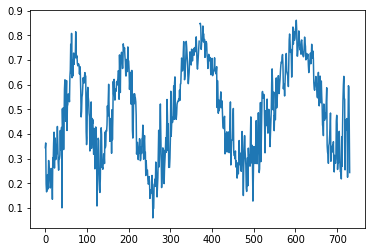

In [21]:
# 10-12 気温に関する折れ線グラフを作成する
df3['temp'].plot(kind='line')

<AxesSubplot:>

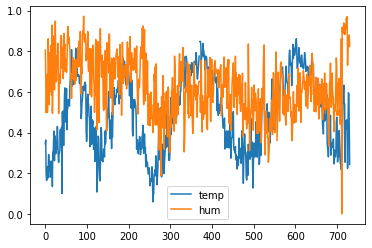

In [22]:
# 10-13 「temp列」と「hum列」を折れ線グラフにして比較する
df3[['temp', 'hum']].plot(kind='line')

<AxesSubplot:ylabel='Frequency'>

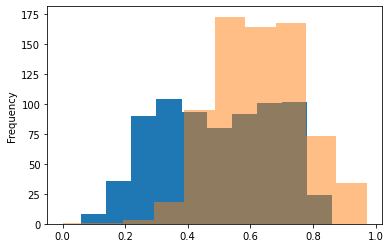

In [23]:
# 10-14 plot()メソッドでヒストグラムを作成する
df3['temp'].plot(kind='hist')
df3['hum'].plot(kind='hist', alpha=0.5)

<AxesSubplot:>

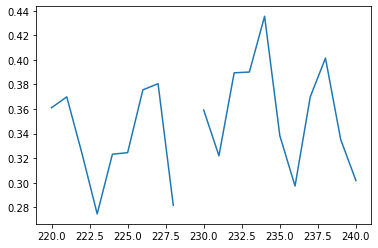

In [24]:
# 10-15 欠損値付近の折れ線グラフを作成する
df3['atemp'].loc[220:240].plot(kind='line')

In [25]:
df3['atemp'].loc[220:240]

220      0.3611
221    0.369942
222    0.323846
223    0.274621
224    0.323225
225    0.324492
226    0.375621
227    0.380667
228    0.281558
229        None
230    0.359208
231    0.321958
232    0.389508
233    0.390146
234    0.435575
235    0.338363
236    0.297338
237    0.369938
238      0.4015
239    0.335217
240    0.301767
Name: atemp, dtype: object

In [26]:
print(type(df3['atemp']))
print(df3['atemp'].dtype)

<class 'pandas.core.series.Series'>
object


<AxesSubplot:>

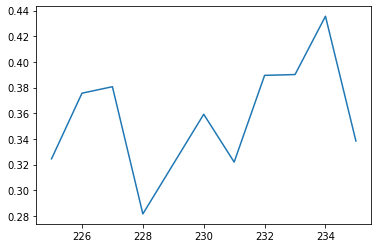

In [27]:
# 10-16 欠損値を線形補間する
# attemp列の方をfloatに変換する
df3['atemp'] = df3['atemp'].astype(float)
# 欠損値を線形補間する
df3['atemp'] = df3['atemp'].interpolate()

df3.loc[225:235, 'atemp'].plot(kind='line')

### 10.2.2 教師あり学習による補完

In [28]:
# 10−17 がく片長さを予測する重回帰の予測モデルを作成する
from sklearn.linear_model import LinearRegression

# 「がく片長さ列」に2個の欠損値がある
iris_df = pd.read_csv('../support/datafiles/iris.csv')
# 欠損値を含む行を削除する
non_df = iris_df.dropna()

x = non_df.loc[:, 'がく片幅':'花弁幅']
t = non_df['がく片長さ']
model = LinearRegression()
model.fit(x, t)

LinearRegression()

In [29]:
# 10-18 欠損データの本来の値を予測させる

# 欠損行の抜き出し
condition = iris_df['がく片長さ'].isnull()
condition

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: がく片長さ, Length: 150, dtype: bool

In [30]:
non_data = iris_df.loc[condition]
non_data

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
61,NaN,0.42,0.65,0.58,Iris-versicolor
137,NaN,0.46,0.57,0.71,Iris-virginica


In [31]:
# 欠損行の入力に利用する特徴量だけを抜き出して、モデルで予測する
x = non_data.loc[:, 'がく片幅':'花弁幅']
x

,がく片幅,花弁長さ,花弁幅
61,0.42,0.65,0.58
137,0.46,0.57,0.71


In [32]:
pred = model.predict(x)
pred

array([0.50543104, 0.572684  ])

In [33]:
# 欠損行のがく片長さのマスを抜き出して、predで代入する
iris_df.loc[condition, 'がく片長さ'] = pred

## 10.3 より高度な外れ値の処理

### 10.3.1 マハラノビス距離

In [34]:
# 10-13 自転車データでマハラノビス距離を計算する
from sklearn.covariance import MinCovDet

# 適当な数値列でマハラノビス距離を計算する
df4 = df3.loc[:, 'atemp':'windspeed']
df4 = df4.dropna()

# マハラノビス距離を計算するための準備
mcd = MinCovDet(random_state=0, support_fraction=0.7)
# マハラノビス距離を計算するために必要な共分散行列
mcd.fit(df4)
# マハラノビス距離
distance = mcd.mahalanobis(df4)
distance

array([5.27754434e+00, 2.95288431e+00, 4.56554287e+00, 1.11292894e+01,
       4.88709108e+00, 3.61583593e+00, 8.14460849e+00, 6.75556991e+00,
       2.87723941e+00, 5.21488750e+00, 3.79416537e+00, 5.40316379e+00,
       6.20213715e+00, 1.10553049e+01, 8.90271314e+00, 3.76946284e+00,
       9.37787119e+00, 8.19067907e+00, 9.96797528e+00, 4.96633549e+00,
       9.49019954e+00, 8.66205425e+00, 4.97595770e+00, 4.10070771e+00,
       1.69047652e+01, 6.72016281e+00, 4.26099138e+00, 1.44169140e+00,
       2.48070141e+00, 5.30852520e+00, 6.32167727e+00, 1.09093890e+01,
       4.97013012e+00, 2.46016070e+00, 8.26586093e+00, 1.55628115e+00,
       1.11467060e+01, 7.12123114e+00, 5.31412121e+00, 3.68894563e+00,
       1.91868229e+03, 4.79217095e+00, 6.04087328e+00, 1.83355572e-01,
       5.17790203e+00, 5.63622705e+00, 2.28418229e+00, 9.46535988e+00,
       6.11551425e+00, 2.28464022e+00, 1.26942361e+00, 7.86245236e+00,
       7.40873776e+00, 3.31990003e+00, 5.12019709e+00, 3.36617674e+00,
      

### 10.3.2 中央値を用いた外れ値の判定

<AxesSubplot:>

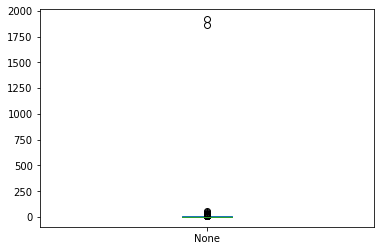

In [35]:
# 10-20 箱ひげ図で外れ値を見つける
distance = pd.Series(distance)
distance.plot(kind='box')

In [36]:
# 10-21 さまざまな基本統計量
tmp = distance.describe()
tmp

count     730.000000
mean       10.571304
std        98.889470
min         0.183356
25%         2.302019
50%         3.780568
75%         6.517596
max      1918.682293
dtype: float64

In [37]:
# 10-22 四分位範囲を用いた外れ値の判定

# IQRの計算
iqr = tmp['75%'] - tmp['25%']
# 上限値
upper = tmp['75%'] + 1.5 * iqr
lower = tmp['25%'] - 1.5 * iqr

# 上限と下限の条件をもとに、Seriesで条件検索する
outliner = distance[ (distance < lower) | (upper < distance) ]
outliner

24       16.904765
40     1918.682293
73       55.357957
81       15.463534
84       18.971056
91       23.001774
92       45.588676
94       15.758195
96       13.702627
130      12.903433
131      13.343114
147      14.180961
203      18.506569
218      14.180812
240      14.623922
243      22.325451
251      30.503908
253      17.347400
254      18.559749
257      23.277609
259      14.843623
264      13.075809
267      21.425291
272      14.908148
277      32.693499
286      16.683825
293      13.484822
375      13.154613
424      16.419222
473      14.412725
474      30.488845
480      18.619394
484      21.011948
497      38.434241
506      27.044165
515      24.183972
536      13.034591
544      13.592724
629    1867.324064
691      21.181155
706      24.551635
708      18.009731
709      20.933194
710      25.115724
711      14.380396
712      13.419876
713      12.949065
714      14.051767
715      27.473939
718      30.054611
724      14.980544
728      15.933540
729      23.

## 10.5 練習問題

In [38]:
# EX.10-4
# Chap.09の続き

In [39]:
# ライブラリの準備
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [40]:
# データの準備
df = pd.read_csv('../support/datafiles/Bank.csv')
print(df.shape)
df.head()

(27128, 16)


,id,age,job,marital,education,default,amount,housing,loan,contact,day,month,duration,campaign,previous,y
0,1,39,blue-collar,married,secondary,no,1756.0,yes,no,cellular,3,apr,370.055237,1,0,1
1,2,51,entrepreneur,married,primary,no,1443.0,no,no,cellular,18,feb,233.998933,10,0,1
2,3,36,management,single,tertiary,no,436.0,no,no,cellular,13,apr,NaN,1,2,0
3,4,63,retired,married,secondary,no,474.0,no,no,cellular,25,jan,252.525808,1,0,0
4,5,31,management,single,tertiary,no,354.0,no,no,cellular,30,apr,NaN,1,2,0


In [41]:
# ダミー変数化をするため、文字列の列が複数あるので抜き出す。
str_col_name = [
    'job','default','marital','education','housing','loan','contact','month'
]
str_df = df[str_col_name]

# 複数列をダミー変数化
str_df2 = pd.get_dummies(str_df, drop_first=True)
# 数値列を抜き出す
num_df = df.drop(str_col_name,axis=1)
# 結合(今後の集計の利便性も考慮してstr_dfも結合しておく)
df2 = pd.concat([num_df, str_df2, str_df], axis=1)
print(df2.shape)
df2.head()

(27128, 48)


,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,job,default,marital,education,housing,loan,contact,month
0,1,39,1756.0,3,370.055237,1,0,1,1,0,...,0,0,blue-collar,no,married,secondary,yes,no,cellular,apr
1,2,51,1443.0,18,233.998933,10,0,1,0,1,...,0,0,entrepreneur,no,married,primary,no,no,cellular,feb
2,3,36,436.0,13,NaN,1,2,0,0,0,...,0,0,management,no,single,tertiary,no,no,cellular,apr
3,4,63,474.0,25,252.525808,1,0,0,0,0,...,0,0,retired,no,married,secondary,no,no,cellular,jan
4,5,31,354.0,30,NaN,1,2,0,0,0,...,0,0,management,no,single,tertiary,no,no,cellular,apr


In [42]:
# 訓練&検証データとテストデータに分割
train_val, test = train_test_split(df2, test_size=0.1, random_state=9)
train_val.head()

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,job,default,marital,education,housing,loan,contact,month
13378,13379,46,0.0,10,378.293875,1,0,1,0,0,...,0,0,unemployed,no,married,tertiary,yes,no,cellular,jul
3800,3801,41,-333.0,30,300.845752,3,2,0,1,0,...,0,0,blue-collar,no,divorced,secondary,yes,no,cellular,jan
10398,10399,30,5389.0,6,159.053623,3,0,1,0,0,...,0,0,management,no,single,tertiary,no,no,cellular,aug
23401,23402,39,255.0,5,334.802583,1,0,0,0,0,...,0,0,management,no,single,tertiary,yes,no,sending _document,may
26223,26224,47,33.0,5,NaN,1,0,1,0,0,...,0,0,services,no,single,secondary,yes,no,cellular,may


In [43]:
# 欠損値の確認
is_nan = train_val.isnull().sum()
# 欠損が存在している列だけ表示
is_nan[is_nan > 0]

duration    6331
dtype: int64

In [44]:
# 「duration列」と各列との相関係数（絶対値）を抜き出す
train_val.corr()['duration'].map(abs).sort_values(ascending=False)

duration                     1.000000
housing_yes                  0.556899
loan_yes                     0.372579
y                            0.277575
age                          0.207738
month_aug                    0.187310
month_may                    0.184593
marital_single               0.164614
previous                     0.143538
marital_married              0.115429
job_student                  0.107913
contact_sending _document    0.087863
education_tertiary           0.081769
job_blue-collar              0.080727
month_jun                    0.065998
month_oct                    0.052855
job_unknown                  0.046328
job_management               0.045735
job_unemployed               0.044179
month_mar                    0.043775
job_housemaid                0.039184
education_secondary          0.033989
job_retired                  0.033277
month_sep                    0.032082
amount                       0.030532
day                          0.023779
job_services

In [61]:
# 数値データ列の外れ値を調べる
num_df = train_val.drop(str_col_name, axis=1)
num_df = num_df.drop('id', axis=1)
num_df2 = num_df.dropna()

print(num_df2.shape)
num_df2.head()

(18084, 39)


,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
13378,46,0.0,10,378.293875,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3800,41,-333.0,30,300.845752,3,2,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
10398,30,5389.0,6,159.053623,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23401,39,255.0,5,334.802583,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25158,52,556.0,13,231.375776,6,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mcd2 = MinCovDet(random_state=0, support_fraction=0.7)
mcd2.fit(num_df2)

<AxesSubplot:>

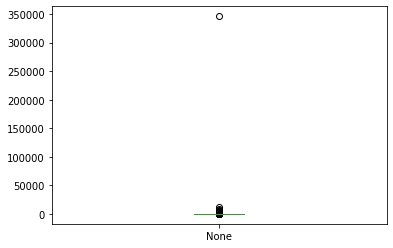

In [46]:
# 箱ひげ図で外れ値を表示する
dis = mcd2.mahalanobis(num_df2)
dis = pd.Series(dis)
dis.plot(kind="box")

In [47]:
# 基本統計量を計算する
dis.describe()

count     18084.000000
mean        199.553389
std        2615.322760
min           8.201404
25%          21.536943
50%          30.961292
75%          75.861095
max      346111.305795
dtype: float64

In [58]:
# 外れ値の表示
no = dis[dis > 300000].index
dis[no]

2561    346111.305795
dtype: float64

In [63]:
# num_df2の「no[0]以上、(no[0]+1)未満」番目のデータを削除する
num_df2.iloc[no[0]:(no[0]+1),:]

,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
3140,40,543.0,2,1435.48804,2,275,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [65]:
no = num_df2.iloc[no[0]:(no[0]+1), :].index
train_val2 = train_val.drop(no)

In [66]:
# 再度、「duration列」と各列との相関係数（絶対値）を抜き出す
train_val2.corr()['duration'].map(abs).sort_values(ascending=False)

duration                     1.000000
housing_yes                  0.559269
loan_yes                     0.374871
y                            0.279582
age                          0.208929
month_aug                    0.188017
month_may                    0.186111
marital_single               0.165022
marital_married              0.115441
job_student                  0.108389
previous                     0.102252
contact_sending _document    0.088832
education_tertiary           0.083440
job_blue-collar              0.081568
month_jun                    0.066075
month_oct                    0.053041
job_management               0.047512
job_unknown                  0.046511
job_unemployed               0.044287
month_mar                    0.043928
job_housemaid                0.039260
education_secondary          0.034967
job_retired                  0.033636
month_sep                    0.032166
amount                       0.030493
day                          0.022636
job_services

- monthはdurationに本質的に影響あるとは思えない
- 特徴量をhousing_yes, loan_yes, age, marital_single, job_studentとする。
- （ｙは最終的な正解データなので除外）    

In [67]:
# 欠損値の確認
is_nan = train_val2.isnull().sum()
# 欠損が存在している列だけ表示
is_nan[is_nan > 0]

duration    6331
dtype: int64

In [68]:
# 欠損行を削除
not_nan_df = train_val2.dropna()
temp_x = not_nan_df[[
    'housing_yes', 'loan_yes', 'age', 'marital_single','job_student'
]]
temp_t = not_nan_df['duration']

In [72]:
temp_x.head()

,housing_yes,loan_yes,age,marital_single,job_student
13378,1,0,46,0,0
3800,1,0,41,0,0
10398,0,0,30,1,0
23401,1,0,39,1,0
25158,0,0,52,1,0


In [69]:
# 線形回帰
model_liner = LinearRegression()

# 今回は予測させたいだけなので、標準化はしない
a, b, c, d = train_test_split(temp_x, temp_t, random_state=0, test_size=0.2)

model_liner.fit(a, c)
print(model_liner.score(a, c),model_liner.score(b, d))

0.7271253237617876 0.7154980171805083


In [73]:
# 「duration列」の欠損値を線形回帰の値で埋める
is_null = train_val2['duration'].isnull()
non_x = train_val2.loc[
    is_null, ['housing_yes', 'loan_yes', 'age', 'marital_single', 'job_student'
]]
pred_d = model_liner.predict(non_x)
train_val2.loc[is_null, 'duration'] = pred_d

<AxesSubplot:ylabel='Frequency'>

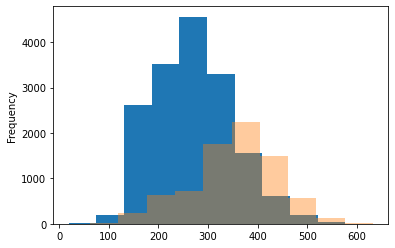

In [74]:
# ヒストグラムの確認
train_val2.loc[train_val['y'] == 0, "duration"].plot(kind="hist")
train_val2.loc[train_val['y'] == 1, "duration"].plot(kind="hist", alpha=0.4)

# y=1の方が、durationが大きい傾向がやっぱりありそう

In [75]:
# 学習できるようなlearn関数を定義する。
def learn(x, t, i):
    x_train, x_val, y_train, y_val = train_test_split(
        x, t, test_size=0.2, random_state=13
    )
    datum = [x_train, x_val, y_train, y_val]
    
    # 不均衡データに対応できるように、class_weight引数も設定
    model = tree.DecisionTreeClassifier(
        random_state=i, max_depth=i, class_weight='balanced'
    )
    model.fit(x_train, y_train)

    train_score = model.score(x_train, y_train)
    val_score = model.score(x_val, y_val)

    return train_score, val_score, model, datum

In [76]:
# learn関数へ渡すデータの準備
t = train_val2['y']
x = train_val2.drop(str_col_name, axis=1)
x = x.drop(['id', 'y', 'day'], axis=1)

In [77]:
# for文でさまざまな決定木の深さでの正解率を調べる
for i in range(1, 15):
    s1, s2, model, datum = learn(x, t, i)
    print(i, s1, s2)

1 0.7436383185704777 0.7651034200286709
2 0.674517433823153 0.6807290600040958
3 0.7416926936664789 0.7569117345893918
4 0.6975065280835595 0.7034609870980955
5 0.7592545184578363 0.7653082121646528
6 0.7422047002201628 0.745033790702437
7 0.7774307511136143 0.7773909481875896
8 0.8082535456453842 0.7939791112021298
9 0.822180123905586 0.7999180831456072
10 0.843377195228099 0.8038091337292648
11 0.8587885924939839 0.7958222404259676
12 0.8744047923813425 0.7886545156665984
13 0.8949874558394347 0.792135981978292
14 0.9094260406533203 0.7911120212983821


In [78]:
# テストデータで調べる
test2 = test.copy()
isnull = test2['duration'].isnull()

model_tree=tree.DecisionTreeClassifier(
    random_state=10, max_depth=10, class_weight="balanced"
)

if isnull.sum() > 0:
    temp_x = test2.loc[
        isnull, ['housing_yes', 'loan_yes', 'age', 'marital_single', 'job_student'
    ]]
    pred_d = model_liner.predict(temp_x)
    test2.loc[isnull,'duration'] = pred_d

x_test = test2.drop(str_col_name, axis=1)
x_test = x_test.drop(['id', 'y', 'day'], axis=1)
y_test = test['y']

model.score(x_test, y_test)
# 9章の最後より若干低下している

0.7814227792112053

In [79]:
# どのような間違い方をしているのか確認
s1, s2, model, datum = learn(x, t, 9)

# 訓練データでの予測結果と実際の値の2軸で個数集計flagがFalseならば、検証データで集計
def syuukei(model, datum, flag=False):
    if flag:
        pre = model.predict(datum[0])
        y_val = datum[2]
    else:
        pre = model.predict(datum[1])
        y_val = datum[3]
    data = {
        "pred": pre,
        "true": y_val
    }
    tmp = pd.DataFrame(data)
    return tmp, pd.pivot_table(tmp, index="true", columns="pred", values="true", aggfunc=len)

tmp, a = syuukei(model, datum, False)
a

pred,0,1
true,,
0,2631,715
1,262,1275


<AxesSubplot:>

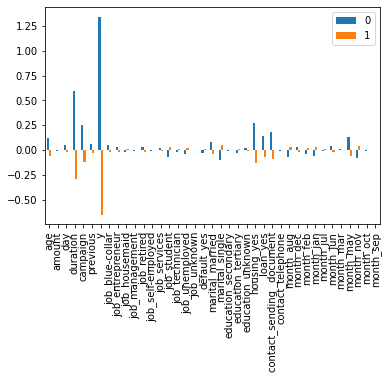

In [80]:
# 値にばらつきが大きいので、標準化してもう一度グラフ化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
tmp2 = train_val2.drop(str_col_name, axis=1)
sc_data = sc.fit_transform(tmp2)
sc_df = pd.DataFrame(sc_data, columns=tmp2.columns, index=tmp2.index)

######挿入箇所#######
pre = model.predict(sc_df.drop(["id", "day", "y"], axis=1))
target = tmp2["y"]
true = (pre == target)
false = (pre != target)
############

true_df = sc_df.loc[true]
false_df = sc_df.loc[false]
true_df
temp2 = pd.concat([false_df.mean()["age":], true_df.mean()["age":]], axis=1)
temp2.plot(kind="bar")


In [81]:
print(train_val2.groupby('loan')['y'].mean(), "\n")
print(train_val2.groupby('housing')['y'].mean())

loan
no     0.300210
yes    0.424328
Name: y, dtype: float64 

housing
no     0.217959
yes    0.400940
Name: y, dtype: float64


In [82]:
train_val3 = train_val2.copy()
train_val3['du*hou'] = train_val3['duration'] * train_val3['housing_yes']
train_val3['du*loan'] = train_val3['duration'] * train_val3['loan_yes']
train_val3['du*age'] = train_val3['duration'] * train_val3['age']

In [83]:
t = train_val3['y']

monthcol = [
    'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
    'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 
    'month_sep'
]
jobcol = [
    'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
    'job_self-employed', 'job_services', 'job_student', 'job_technician',
    'job_unemployed', 'job_unknown'
]
x = train_val3.drop(str_col_name, axis=1)
x = x.drop(jobcol, axis=1)
x = x.drop(monthcol, axis=1)
x = x.drop(['id', 'y', 'day'], axis=1)
x.columns

Index(['age', 'amount', 'duration', 'campaign', 'previous', 'job_blue-collar',
       'default_yes', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'housing_yes', 'loan_yes', 'contact_sending _document',
       'contact_telephone', 'du*hou', 'du*loan', 'du*age'],
      dtype='object')

In [84]:
# for文でさまざまな決定木の深さでの正解率を調べる
for i in range(5, 15):
    s1, s2, model, datum = learn(x, t, i)
    print(i, s1, s2)

5 0.7585377092826788 0.7648986278926889
6 0.7422559008755312 0.7440098300225272
7 0.7811171983001383 0.7792340774114274
8 0.8061543187752803 0.7876305549866885
9 0.8267369822333726 0.801146835961499
10 0.8407147611489427 0.7978701617857874
11 0.8552045466181967 0.7911120212983821
12 0.8780912395678665 0.7988941224656974
13 0.8984691004044851 0.7982797460577514
14 0.9142901029133172 0.7978701617857874


In [85]:
s1, s2, model, datum = learn(x, t, 9)
tmp, a = syuukei(model, datum, False)
a

pred,0,1
true,,
0,2653,693
1,278,1259


In [86]:
pd.Series(model.feature_importances_,index=x.columns)

age                          0.103160
amount                       0.019240
duration                     0.522389
campaign                     0.141550
previous                     0.012433
job_blue-collar              0.000689
default_yes                  0.001352
marital_married              0.001845
marital_single               0.001906
education_secondary          0.001850
education_tertiary           0.001379
education_unknown            0.000689
housing_yes                  0.020159
loan_yes                     0.018217
contact_sending _document    0.019211
contact_telephone            0.000493
du*hou                       0.034961
du*loan                      0.043253
du*age                       0.055223
dtype: float64

In [87]:
i = 9
model = tree.DecisionTreeClassifier(
    random_state=i, max_depth=i, class_weight="balanced"
)
model.fit(x, t)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=9)

In [88]:
# テストデータでも調べる
test2 = test.copy()
isnull = test['duration'].isnull()

if isnull.sum() > 0:
    temp_x = test2.loc[
        isnull, 
        ['housing_yes', 'loan_yes', 'age', 'marital_single', 'job_student']
    ]
    pred_d = model_liner.predict(temp_x)
    test2.loc[isnull,'duration'] = pred_d

test2['du*hou'] = test2['duration'] * test2['housing_yes']
test2['du*loan'] = test2['duration'] * test2['loan_yes']
test2['du*age'] = test2['duration'] * test2['age']

x_test = test2.drop(str_col_name, axis=1)
x_test = x_test.drop(jobcol, axis=1)
x_test = x_test.drop(monthcol, axis=1)
x_test = x_test.drop(['id', 'y', 'day'], axis=1)
y_test = test['y']
x_test.columns
model.score(x_test, y_test)

0.7913748617766311

- 直観的に考えて、9章では、housingとloanで集計しており、今回の線形回帰では、それらの列も含まれているから、
- durationの性能はよりよくなるはず、でも全体のモデルの正解率は1%ほど低下している
- 原因の仮説⇒ 
  - １．現状の線形回帰だと訓練&検証に過学習してしまい、テストデータにフィットしない。
    - （そもそもテストデータではdurationがあまり関係していない？？）
  - 2. 純粋な決定木の限界？ 
  - 3. 現在考慮していない特徴量ももっとしっかりした方が良いのか？？

次以降の章で仮説1,2について検討できるので、次章に続く。